# 저주파 통과 필터

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import io

In [3]:
input_mat = io.loadmat('./data/3.LPF/SonarAlt.mat')

## 저주파 통과 필터 함수
- 예제(2장과 동일) : 이평손 연구원은 초음파 거리계는 개발하는 중이다. 시제품의 성능을 검증하기 위해 헬기에 초음파거리계를 장착하고 지면까지의 거리를 측정하는 비행 시험을 실시했다. 측정값은 0.02초 간격으로 저장했다. 그런데 헬기의 진동, 지면 상태 등의 영향으로 측정 데이터에 잡음이 심했다. 이동평균필터로 이 잡음을 제거해보자.

In [5]:
def low_pass_filter(x_meas, x_esti):
    """저주파 통과 필터 함수를 통해 초음파 계산"""
    x_esti = alpha * x_esti + (1 - alpha) * x_meas
    return x_esti

In [6]:
def get_sonar(i):
    """초음파 측정값 반환"""
    z = input_mat['sonarAlt'][0][i]  # input_mat['sonaralt']: (1, 1501)
    return z

In [7]:
# Input parameters.
alpha = 0.7
n_samples = 500
time_end = 10

In [8]:
dt = time_end / n_samples
time = np.arange(0, time_end, dt)
x_meas_save = np.zeros(n_samples)
x_esti_save = np.zeros(n_samples)

In [9]:
x_esti = None
for i in range(n_samples):
    x_meas = get_sonar(i)
    if i == 0:
        x_esti = x_meas
    else:
        x_esti = low_pass_filter(x_meas, x_esti)

    x_meas_save[i] = x_meas
    x_esti_save[i] = x_esti

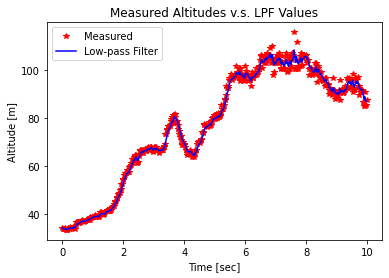

In [11]:
plt.plot(time, x_meas_save, 'r*', label='Measured')
plt.plot(time, x_esti_save, 'b-', label='Low-pass Filter')
plt.legend(loc='upper left')
plt.title('Measured Altitudes v.s. LPF Values')
plt.xlabel('Time [sec]')
plt.ylabel('Altitude [m]')
plt.show()

- 측정데이터의 잡음 제거 및 고도 변화 추이 잘 나타나 있음
- 측정데이터에 맞게 alpha 선정했는지가 중요

### alpha값을 다르게 설정했을 때 (0.4 / 0.9)

In [13]:
# alpha를 0.4로 설정
alpha = 0.4
n_samples = 500
time_end = 10

In [15]:
dt = time_end / n_samples
time = np.arange(0, time_end, dt)
low_x_meas_save = np.zeros(n_samples)
low_x_esti_save = np.zeros(n_samples)

In [16]:
x_esti = None
for i in range(n_samples):
    x_meas = get_sonar(i)
    if i == 0:
        x_esti = x_meas
    else:
        x_esti = low_pass_filter(x_meas, x_esti)

    low_x_meas_save[i] = x_meas
    low_x_esti_save[i] = x_esti

In [17]:
# alpha를 0.9로 설정
alpha = 0.9

In [18]:
dt = time_end / n_samples
time = np.arange(0, time_end, dt)
high_x_meas_save = np.zeros(n_samples)
high_x_esti_save = np.zeros(n_samples)

In [19]:
x_esti = None
for i in range(n_samples):
    x_meas = get_sonar(i)
    if i == 0:
        x_esti = x_meas
    else:
        x_esti = low_pass_filter(x_meas, x_esti)

    high_x_meas_save[i] = x_meas
    high_x_esti_save[i] = x_esti

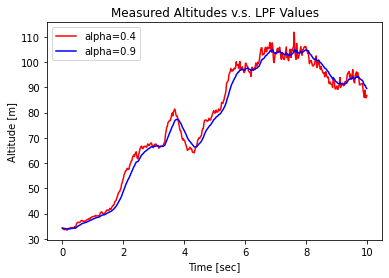

In [21]:
plt.plot(time, low_x_esti_save, 'r-', label='alpha=0.4')
plt.plot(time, high_x_esti_save, 'b-', label='alpha=0.9')
plt.legend(loc='upper left')
plt.title('Measured Altitudes v.s. LPF Values')
plt.xlabel('Time [sec]')
plt.ylabel('Altitude [m]')
plt.show()

- alpha가 작으면 잡음이 더 많고, alpha가 크면 잡음은 줄지만 시간지연이 커짐
- alpha가 작으면 1-alpha값이 상대적으로 더 커져 측정값의 변화에 더 민감
- alpha가 크면 직전 추정값의 비중이 더 커져 그래프의 변화 무뎌짐

## 3장 요약
- 1차 저주파 통과 필터의 수식은 간단하고 구현하기 쉬움
- 이동평균 필터와 달리 최신 측정값에 더 큰 가중치
- 이동평균 필터보다 측정 신호의 변화 추이를 더 잘 감지
- 1차 저주파 통과 필터와 지수 가중 이동평균필터는 같은 필터를 뜻함